In [ ]:
'''
Build the image classification model by dividing the model into 4 stages:
a.Loading and Preprocessing the image data
b.Defining the model architecture
c.Training the model
d.Estimating the model's performance
'''

In [ ]:
'''Image classification
Image classification is the task of taking an input image and outputing a class or a
probability of classes that best describe the image
'''

In [ ]:
'''Convolutional Neural Network
CNN is a type of artifical Neural network which is widelty used for image classification.
Deep Learning recognizes objects in an image by using CNN
'''

In [17]:
# importing necessary packages
import tensorflow as tf
from keras.models import Sequential 
#Dense for hidden and output layer , Conv2D to create Convolution network , Dropout to remove the random neurons , flattern input into vector form , maxpool to maxpool
from keras.layers import Dense,Conv2D,Dropout,Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# a) Loading and PreProcessing Image Data
#MNIST->mnist digits classification dataset of 60 thousand 28*28 grayscale images of 10digits
mnist = tf.keras.datasets.mnist#Importing MNIST Dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()#Splitting it into training and testing
input_shape = (28,28,1) #image_shape=(pixel,pixel,channel)

In [19]:
# for Preprocessing ->Reshape Data

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

x_train = x_train.astype('float32') #convert input data to float data type
x_test = x_test.astype('float32')

In [20]:
x_train = x_train/255 #convert the data 0 to 1 range
x_test = x_test/255
print('shape of Training:',x_train.shape)

shape of Training: (60000, 28, 28, 1)


In [21]:
# defining the model architecture

model = Sequential() #use sequential model to add layer by layer
#conv(how many layers , filter size , input data)
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) #input data to vectorform
model.add(Dense(200,activation="relu"))
model.add(Dropout(0.3)) #remove random neurons 30%
model.add(Dense(10,activation="softmax")) #output 10 neurons

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 200)               946600    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                      

In [22]:
# c) Training the model
#complie is used to train (optimise,dissimiarity,performace measures)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#Epoch as the total number of iterations of all the training data in one cycle for training the ML model
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2034 - accuracy: 0.9388
Epoch 2/2
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0863 - accuracy: 0.9733


In [23]:
# d) Estimating the model performance

test_loss,test_acc = model.evaluate(x_test,y_test)
print('loss=%.3f',test_loss)
print('accuracy=%.3f',test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0608 - accuracy: 0.9811
loss=%.3f 0.06078973412513733
accuracy=%.3f 0.9811000227928162


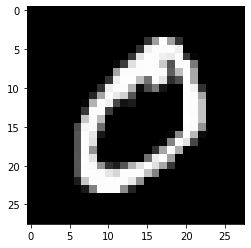

In [24]:
#showing image at position [] from dataset
image = x_train[1]
#remove the entries in the given array 
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [26]:
#Predicting the class of image
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model = model.predict([image])
print('Predict class : {}'.format(np.argmax(predict_model))) #argmax is fuction witch gives the max Probaility of image to witch it belongs

1/1 [==============================] - 0s 50ms/step
Predict class : 0
